In [1]:
#Import Data
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [2]:
!pip install config
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
raw_data = pd.read_csv("insurance.csv")

In [4]:
#Data Cleaning - Numberize the data(Sex, Somker, Region)

from sklearn import preprocessing
label = preprocessing.LabelEncoder()
df1 = raw_data
df1['sex'] = label.fit_transform(raw_data['sex'])
df1['smoker'] = label.fit_transform(raw_data['smoker'])
df1['region'] = label.fit_transform(raw_data['region'])
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


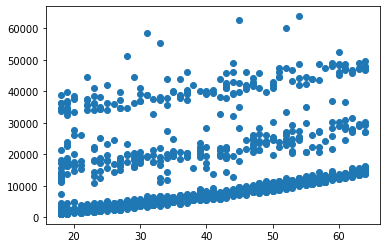

In [5]:
#Seeing three cluster
fig, ax = plt.subplots()
scatter=plt.scatter(df1['age'],df1['charges'], cmap='rainbow')

In [6]:
#Make a copy
cluster_data = df1
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [10]:
#Sklearn Initialize KNN Model
from sklearn.cluster import KMeans
kmeans3=KMeans(3)
x=df1


In [18]:
kmeans3.fit(x)
identified_clusters=kmeans3.fit_predict(x)
identified_clusters

array([2, 0, 0, ..., 0, 0, 1], dtype=int32)

In [19]:
identified_clusters

array([2, 0, 0, ..., 0, 0, 1], dtype=int32)

In [20]:
data_with_clusters=df1
data_with_clusters['Clusters']=identified_clusters

In [21]:
data_with_clusters['name Clusters']= data_with_clusters['Clusters']
data_with_clusters['name Clusters']= data_with_clusters['Clusters'].apply(str)
data_with_clusters['name Clusters']= data_with_clusters['name Clusters'].map({'0':'low_charges','1':'hig_charges','2': 'Med_charges'})

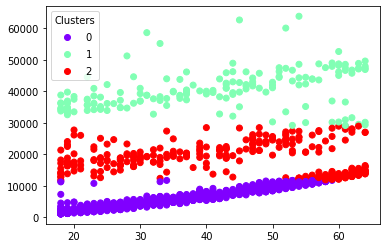

In [22]:
fig, ax = plt.subplots()
scatter=plt.scatter(data_with_clusters['age'],data_with_clusters['charges'], c=data_with_clusters['Clusters'], cmap='rainbow')

legend1 = ax.legend(*scatter.legend_elements(),
                     title="Clusters")

In [24]:
kmeans3.cluster_centers_

array([[3.57765700e+01, 5.04830918e-01, 3.04700664e+01, 1.10024155e+00,
        1.49880108e-15, 1.55555556e+00, 6.01059930e+03],
       [4.08554217e+01, 6.20481928e-01, 3.47045482e+01, 1.15060241e+00,
        9.33734940e-01, 1.59036145e+00, 4.04850240e+04],
       [4.66686047e+01, 4.50581395e-01, 2.91786483e+01, 1.05523256e+00,
        3.45930233e-01, 1.38372093e+00, 1.76120197e+04]])

In [25]:
# Nomalizing Code
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(df1)
# df1 = scaler.transform(df1)

In [31]:
raw_data = pd.read_csv("insurance.csv")
#Data Cleaning - Numberize the data(Sex, Somker, Region)

from sklearn import preprocessing
label = preprocessing.LabelEncoder()
df1 = raw_data
df1['sex'] = label.fit_transform(raw_data['sex'])
df1['smoker'] = label.fit_transform(raw_data['smoker'])
df1['region'] = label.fit_transform(raw_data['region'])
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [32]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)

gmm.fit(df1)
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [34]:
print(gmm.means_)
print('\n')
#print(gmm.covariances_)

[[3.91765791e+01 4.84970755e-01 3.11098374e+01 1.22347534e+00
  0.00000000e+00 1.33407180e+00 2.19074901e+04]
 [3.94068370e+01 4.85998185e-01 3.06046244e+01 1.07650307e+00
  0.00000000e+00 1.53574732e+00 7.04675216e+03]
 [3.85145985e+01 5.80291971e-01 3.07084489e+01 1.11313869e+00
  1.00000000e+00 1.51094891e+00 3.20502318e+04]]




In [35]:
identified_clusters2=gmm.fit_predict(df1)
data_with_clusters2= pd.DataFrame(df1, columns=['age',	'sex',	'bmi',	'children',	'smoker',	'region',	'charges'])
data_with_clusters2['Clusters2']=identified_clusters2

In [36]:
data_with_clusters2['name Clusters2']=data_with_clusters2['Clusters2']
data_with_clusters2['name Clusters2']=data_with_clusters2['Clusters2'].apply(str)
data_with_clusters2['name Clusters2']= data_with_clusters2['name Clusters2'].map({'0':'low_charges','1':'hig_charges','2': 'Med_charges'})

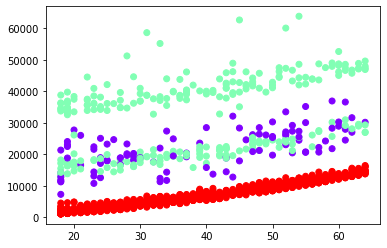

In [38]:
fig, ax = plt.subplots()
scatter=plt.scatter(data_with_clusters2['age'],data_with_clusters2['charges'], c=data_with_clusters2['Clusters2'], cmap='rainbow')
